# Visualization for thesis

## Set up

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import os
from os import path

import sys
sys.path.append("./../src")

In [ ]:
from modules.logger import init_logging
from modules.logger import log

init_logging(color=True)

In [ ]:
cache_path = path.join(os.getcwd(), '..', '.cache')
dataset_path = path.join(cache_path, 'dataset')
tmp_path = path.join('.cache', '2024-04-14')
os.makedirs(tmp_path,exist_ok=True)

## Run on OVH server

### Preparing dataset

Check if datasets in `.cache` or in `backup` are appropriate for the training

In [4]:
import pandas as pd

In [4]:
# esnli from .cache

df_esnli = pd.read_parquet('/Users/dunguyen/Developer/explanation_on_pair_sequences_task/.cache/dataset/esnli/test.pretransformed.parquet')
display(df_esnli.head())
display(df_esnli.columns)

,id,premise,hypothesis,label,explanation,highlight_premise,highlight_hypothesis,tokens.norm.premise,tokens.norm.hypothesis,rationale.premise,rationale.hypothesis,heuristic.premise,heuristic.hypothesis,tokens.form.premise,tokens.form.hypothesis
0,2677109430.jpg#1r1n,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,neutral,Not all churches have cracks in the ceiling,This church choir sings to the masses as they ...,The church has *cracks* *in* *the* *ceiling.*,"[this, church, choir, sing, to, the, masse, as...","[the, church, have, crack, in, the, ceiling, .]","[False, False, False, False, False, False, Fal...","[False, False, False, True, True, True, True, ...","[-1.0000000150474662e+30, 3.064525842666626, 1...","[-1.0000000150474662e+30, 7.628961086273193, -...","[This, church, choir, sings, to, the, masses, ...","[The, church, has, cracks, in, the, ceiling, .]"
1,2677109430.jpg#1r1e,This church choir sings to the masses as they ...,The church is filled with song.,entailment,"""Filled with song"" is a rephrasing of the ""cho...",This church *choir* *sings* *to* *the* *masses...,The church is *filled* *with* *song.*,"[this, church, choir, sing, to, the, masse, as...","[the, church, be, fill, with, song, .]","[False, False, True, True, True, True, True, F...","[False, False, False, True, True, True, False]","[-1.0000000150474662e+30, 2.79181170463562, 2....","[-1.0000000150474662e+30, 7.628961086273193, -...","[This, church, choir, sings, to, the, masses, ...","[The, church, is, filled, with, song, .]"
2,2677109430.jpg#1r1c,This church choir sings to the masses as they ...,A choir singing at a baseball game.,contradiction,A choir sing some other songs other than book ...,This church choir sings to the *masses* as the...,A choir *singing* at a *baseball* *game.*,"[this, church, choir, sing, to, the, masse, as...","[a, choir, singing, at, a, baseball, game, .]","[False, False, False, False, False, False, Tru...","[False, False, True, False, False, True, True,...","[-1.0000000150474662e+30, 2.5598971843719482, ...","[-1.0000000150474662e+30, 6.388305187225342, 6...","[This, church, choir, sings, to, the, masses, ...","[A, choir, singing, at, a, baseball, game, .]"
3,6160193920.jpg#4r1n,"A woman with a green headscarf, blue shirt and...",The woman is young.,neutral,the woman could've been old rather than young,"A woman with a green headscarf, blue shirt and...",The woman is *young.*,"[a, woman, with, a, green, headscarf, ,, blue,...","[the, woman, be, young, .]","[False, False, False, False, False, False, Fal...","[False, False, False, True, False]","[-1.0000000150474662e+30, 2.597653388977051, -...","[-1.0000000150474662e+30, 5.648240089416504, -...","[A, woman, with, a, green, headscarf, ,, blue,...","[The, woman, is, young, .]"
4,6160193920.jpg#4r1e,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,entailment,a grin suggests hapiness.,"A woman with a green headscarf, blue shirt and...",The woman is very *happy.*,"[a, woman, with, a, green, headscarf, ,, blue,...","[the, woman, be, very, happy, .]","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, False]","[-1.0000000150474662e+30, 2.784580707550049, -...","[-1.0000000150474662e+30, 5.648240089416504, -...","[A, woman, with, a, green, headscarf, ,, blue,...","[The, woman, is, very, happy, .]"


Index(['id', 'premise', 'hypothesis', 'label', 'explanation',
       'highlight_premise', 'highlight_hypothesis', 'tokens.norm.premise',
       'tokens.norm.hypothesis', 'rationale.premise', 'rationale.hypothesis',
       'heuristic.premise', 'heuristic.hypothesis', 'tokens.form.premise',
       'tokens.form.hypothesis'],
      dtype='object')

## Chapter Introduction

In [166]:
out_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/illustration_attention_annotation'
os.makedirs(out_path, exist_ok=True)

html_path = out_path + '/html'
os.makedirs(html_path, exist_ok=True)

In [178]:
import pandas as pd
import torch

# Load test set
testset_path = path.join(ROOT, '..', 'dataset', 'yelp-hat', 'yelp50.json')
df_test = pd.read_json(testset_path)

# Load attention maps
attention_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/lstm_attention/yelphat50/run=0_lstm=1/predictions/inference.json'
predictions = pd.read_json(attention_path)
predictions = predictions[['id', 'a_hat', 'y_hat', 'y_true', 'padding_mask']]

def clean_padding(row):
    a_hat = torch.tensor(row['a_hat'])
    padding_mask = torch.tensor(row['padding_mask'])
    return a_hat[~padding_mask].tolist()

predictions['a_hat'] = predictions[['a_hat', 'padding_mask']].apply(clean_padding, axis=1)

# Add prediction columns to the testset
df_test = df_test.merge(predictions, on='id')

# Only correct predictions
df_test = df_test[df_test['y_hat'] == df_test['y_true']]

In [187]:
from modules.const import Color
from tqdm.auto import tqdm
from modules.utils import highlight
import html

dataset_name = 'Yelp-Hat'

for idx, row in tqdm(df_test.iterrows(), total=len(df_test)):
    
    tokens = row['tokens.form']
    tokens = [html.escape(tk) for tk in tokens]
    token_pos = [word + '<sub style="font-size: small" class="badge badge-' + ('info' if fil else 'danger' ) + '">' + pos + '</sub>' for word, pos, fil in zip(tokens, row['tokens.pos'], row['morpho_filter'])]
    row['label'] = 'positive' if row['label'] == 1 else 'negative'
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+row['id'] + '''</caption>
        <tr><th style="width:200px;text-align:center;">Explainer</th> <th style="width:600px;text-align:center;">Explanation</th> <th style="width:100px;text-align:center;">Label</th></tr>

    '''
    
    html_str += '''<tr><td style="text-align:right;">Human annotation</td><td>''' + highlight(tokens, row['ham'], color=Color.HIGHLIGHT) +\
                     '''</td><td rowspan="5" style="text-align:center">'''+ row['label'] +'''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Attention map</td><td>''' + highlight(tokens, row['a_hat'], Color.ATTENTION) + '''</td></tr>'''
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    
    with open(html_path + '/' + row['id'] + '.html', 'w') as f:
        f.write(html_str)

  0%|          | 0/279 [00:00<?, ?it/s]

## Chapter 3

### Render qualitative result on how increasing lambda will affect the attention maps

In [233]:
ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/'
EXP_ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/'

#### Supervision

In [286]:
from tqdm.auto import tqdm
import json

# Order: Supervision > Semi-supervision > Regularization
technique = 'supervision'
dataset = 'esnli'
models = [
    'run=0_lstm=1',
    'run=0_lstm=1_lsup=0.5',
    'run=0_lstm=1_lsup=1.0',
    'run=0_lstm=1_lsup=10.0',
]
best_model = 'run=0_lstm=1_lsup=1.0'

# Check if all inference files are in places
for model_name in models:
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    if not path.exists(prediction_path):
        log.error(f'Inference file not exist: {prediction_path}')
        raise Exception

In [287]:
import torch

# Once for all: clean padding mask for all inference files
for model_name in tqdm(models, desc='Clean padding'):
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    clean_prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
        
    if 'padding_mask.premise' not in inference[0]:
        log.debug(f'No clean in {model_name}')
        continue

    clean_inference = []
    for instance in inference:
        for side in ['premise', 'hypothesis']:
            padding_mask = instance['padding_mask.'+side]
            instance['tokens.norm.'+side] =  [e for e, m in zip(instance['tokens.norm.'+side], padding_mask) if not m]
            instance['tokens.form.'+side] =  [e for e, m in zip(instance['tokens.form.'+side], padding_mask) if not m]
            instance['a_true.'+side] =  [e for e, m in zip(instance['a_true.'+side], padding_mask) if not m]
            instance['a_hat.'+side] =  [e for e, m in zip(instance['a_hat.'+side], padding_mask) if not m]
            instance['heuristic.'+side] =  [e for e, m in zip(instance['heuristic.'+side], padding_mask) if not m]
            
            # normalize heuristic
            instance['heuristic.'+side] = torch.tensor(instance['heuristic.'+side]).exp().tolist()
            
            del instance['padding_mask.'+side]
            del instance[side]
            del instance['highlight_'+side]
            del instance['rationale.'+side]
            del instance['tokens.ids.'+side]
            
        del instance['explanation']
        clean_inference.append(instance)
    inference = clean_inference
    
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli'),exist_ok=True)
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique), exist_ok=True)
    with open(clean_prediction_path, 'w') as f:
        json.dump(inference, f)

Clean padding:   0%|          | 0/4 [00:00<?, ?it/s]

In [292]:
# List of predictions with following keys: 
# instance_id: 
# - label: str
# - y_true: []
# - a_true: []
# - y_hat: {<model_name>: []}
# - a_hat: {<model_name>: []}
model_inferences = dict()
stop_flag = False
for model_name in models:
    print(model_name)
    prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
    
    inference = {instance['id']: instance for instance in inference}
    
    # First time load -> load annotation, tokens, labels
        
    for idx, inf_data in inference.items():

        inf_data['tokens.form.premise'] = [html.escape(tk) for tk in inf_data['tokens.form.premise']]
        inf_data['tokens.form.hypothesis'] = [html.escape(tk) for tk in inf_data['tokens.form.hypothesis']]
        
        if idx not in model_inferences:
            model_inferences[idx] = {
                'tokens': ['<b>Premise:</b> '] + inf_data['tokens.form.premise'] + ['<br/><b>Hypothesis:</b> '] + inf_data['tokens.form.hypothesis'],
                'label': inf_data['label'],
                'y_true': inf_data['y_true'],
                'a_true': [0] +inf_data['a_true.premise'] + [0] + inf_data['a_true.hypothesis'],
                'a_heuris': [0] +inf_data['heuristic.premise'] + [0] + inf_data['heuristic.hypothesis'],
                'a_hat': { model_name: [0] + inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']},
                'y_hat': { model_name: inf_data['y_hat'] }
            }
    
        else:
            model_inferences[idx]['a_hat'][model_name] = [0] +inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']
            model_inferences[idx]['y_hat'][model_name] = inf_data['y_hat']
            

run=0_lstm=1
run=0_lstm=1_lsup=0.5
run=0_lstm=1_lsup=1.0
run=0_lstm=1_lsup=10.0


Filter instances

In [293]:
# Filter the neutral labels
idx_neutral = []
for idx, instance in model_inferences.items():
    if instance['y_true'] == 'neutral': idx_neutral.append(idx)
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_neutral}

print('#Sample no neutral:', len(model_inferences))

# Filter the incorrect predictions:
idx_incorrect = []
for idx, instance in model_inferences.items():
    y_true = instance['y_true']
    
    # For y_hat predicted by each model, if at least one got it wrong -> eliminate
    for model_name, y_hat in instance['y_hat'].items():
        if y_hat != y_true:
            idx_incorrect.append(idx)
            break
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_incorrect} 

print('#Sample left:', len(model_inferences))

# Caching temporary result:
with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/model_inferences.json', 'w') as f:
    json.dump(model_inferences, f)

#Sample no neutral: 6605
#Sample left: 4559


In [294]:
import html
from modules import highlight
from modules.const import Color
import torch
from torchmetrics.functional import average_precision

# Templates columns:
# - Supervision : lambda/annotation - visualization - AUPRC
# - Semi-supervision : lambda/annotation - visualization - AUPRC - KLDiv
# - Regularization : lambda/annotation - visualization - AUPRC - entropy
dataset_name = 'e-SNLI'
os.makedirs(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html', exist_ok=True)
for idx, row in tqdm(model_inferences.items(), desc='Rendering HTML'):
    tokens = row['tokens']
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+idx+''' - Label: '''+row['label']+''' </caption>
        <tr><th style="width:150px;text-align:center;"> </th> 
        <th style="width:650px;text-align:center;">Explanation</th> 
        <th style="width:100px;text-align:center;">AURPC</th></tr>

    '''
    
    html_str += '''<tr><td style="text-align:right;">Annotation</td>'''+\
                '''<td style="text-align:left;">''' + highlight(tokens, row['a_true'], color=Color.HIGHLIGHT) + '''</td>'''+\
                '''<td></td></tr>'''
    
    a_true = torch.tensor(row['a_true'])
    
    for model_name, a_hat in row['a_hat'].items():
        auprc = average_precision(torch.tensor(a_hat), a_true).item()
        auprc = round(auprc, 2)
        
        name_parts = {key:value for key, value in (pair.split('=') for pair in model_name.split('_'))}
        html_model_name = f'&lambda;<sub>sup</sub> = {name_parts["lsup"]}' if 'lsup' in name_parts else 'Baseline <br/>(&lambda;<sub>sup</sub> = 0)'
        
        if model_name == best_model:
            html_model_name = '<b><u>' + html_model_name + '&#42; </u></b>'
        
        html_str += '''<tr><td style="text-align:right;">'''+ html_model_name +'''</td>'''+\
                    '''<td style="text-align:left;">''' + highlight(tokens, a_hat, Color.ATTENTION) +'''</td>'''+ \
                    '''<td style="text-align:center">'''+ str(auprc) +'''</td></tr>'''
        
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    #break
    
    with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html/{idx}.html', 'w') as f:
        f.write(html_str)
    

Rendering HTML:   0%|          | 0/4559 [00:00<?, ?it/s]

#### Semi-supervision

In [295]:
from tqdm.auto import tqdm
import json

# Order: Supervision > Semi-supervision > Regularization
technique = 'semisupervision'
dataset = 'esnli'
models = [
    'run=0_lstm=1',
    'run=0_lstm=1_lheuris=0.02',
    'run=0_lstm=1_lheuris=0.1',
    'run=0_lstm=1_lheuris=0.5',
]
best_model = 'run=0_lstm=1_lheuris=0.02'

# Check if all inference files are in places
for model_name in models:
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    if not path.exists(prediction_path):
        log.error(f'Inference file not exist: {prediction_path}')
        raise Exception

In [296]:
import torch

# Once for all: clean padding mask for all inference files
for model_name in tqdm(models, desc='Clean padding'):
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    clean_prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
        
    if 'padding_mask.premise' not in inference[0]:
        log.debug(f'No clean in {model_name}')
        continue

    clean_inference = []
    for instance in inference:
        for side in ['premise', 'hypothesis']:
            padding_mask = instance['padding_mask.'+side]
            instance['tokens.norm.'+side] =  [e for e, m in zip(instance['tokens.norm.'+side], padding_mask) if not m]
            instance['tokens.form.'+side] =  [e for e, m in zip(instance['tokens.form.'+side], padding_mask) if not m]
            instance['a_true.'+side] =  [e for e, m in zip(instance['a_true.'+side], padding_mask) if not m]
            instance['a_hat.'+side] =  [e for e, m in zip(instance['a_hat.'+side], padding_mask) if not m]
            instance['heuristic.'+side] =  [e for e, m in zip(instance['heuristic.'+side], padding_mask) if not m]
            
            # normalize heuristic
            instance['heuristic.'+side] = torch.tensor(instance['heuristic.'+side]).exp().tolist()
            
            del instance['padding_mask.'+side]
            del instance[side]
            del instance['highlight_'+side]
            del instance['rationale.'+side]
            del instance['tokens.ids.'+side]
            
        del instance['explanation']
        clean_inference.append(instance)
    inference = clean_inference
    
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli'),exist_ok=True)
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique), exist_ok=True)
    with open(clean_prediction_path, 'w') as f:
        json.dump(inference, f)

Clean padding:   0%|          | 0/4 [00:00<?, ?it/s]

In [297]:
# List of predictions with following keys: 
# instance_id: 
# - label: str
# - tokens: [str]
# - y_true: [int]
# - a_true: [float]
# - a_heuris: [float]
# - y_hat: {<model_name>: []}
# - a_hat: {<model_name>: []}
model_inferences = dict()
for model_name in models:
    print(model_name)
    prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
    
    inference = {instance['id']: instance for instance in inference}
    
    # First time load -> load annotation, tokens, labels
        
    for idx, inf_data in inference.items():

        inf_data['tokens.form.premise'] = [html.escape(tk) for tk in inf_data['tokens.form.premise']]
        inf_data['tokens.form.hypothesis'] = [html.escape(tk) for tk in inf_data['tokens.form.hypothesis']]
        
        if idx not in model_inferences:
            model_inferences[idx] = {
                'tokens': ['<b>Premise:</b> '] + inf_data['tokens.form.premise'] + ['<br/><b>Hypothesis:</b> '] + inf_data['tokens.form.hypothesis'],
                'label': inf_data['label'],
                'y_true': inf_data['y_true'],
                'a_true': [0] +inf_data['a_true.premise'] + [0] + inf_data['a_true.hypothesis'],
                'a_heuris': [0] +inf_data['heuristic.premise'] + [0] + inf_data['heuristic.hypothesis'],
                'a_hat': { model_name: [0] + inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']},
                'y_hat': { model_name: inf_data['y_hat'] }
            }
    
        else:
            model_inferences[idx]['a_hat'][model_name] = [0] +inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']
            model_inferences[idx]['y_hat'][model_name] = inf_data['y_hat']

run=0_lstm=1
run=0_lstm=1_lheuris=0.02
run=0_lstm=1_lheuris=0.1
run=0_lstm=1_lheuris=0.5


In [298]:
# Filter the neutral labels
idx_neutral = []
for idx, instance in model_inferences.items():
    if instance['y_true'] == 'neutral': idx_neutral.append(idx)
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_neutral}

print('#Sample no neutral:', len(model_inferences))

# Filter the incorrect predictions:
idx_incorrect = []
for idx, instance in model_inferences.items():
    y_true = instance['y_true']
    
    # For y_hat predicted by each model, if at least one got it wrong -> eliminate
    for model_name, y_hat in instance['y_hat'].items():
        if y_hat != y_true:
            idx_incorrect.append(idx)
            break
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_incorrect} 

print('#Sample left:', len(model_inferences))

# Caching temporary result:
with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/model_inferences.json', 'w') as f:
    json.dump(model_inferences, f)

#Sample no neutral: 6605
#Sample left: 4868


In [299]:
import html
from modules import highlight
from modules.const import Color
import torch
from torchmetrics.functional import average_precision, kl_divergence

# Templates columns:
# - Supervision : lambda/annotation - visualization - AUPRC
# - Semi-supervision : lambda/annotation - visualization - AUPRC - KLDiv
# - Regularization : lambda/annotation - visualization - AUPRC - entropy
dataset_name = 'e-SNLI'
os.makedirs(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html', exist_ok=True)
for idx, row in tqdm(model_inferences.items(), desc='Rendering HTML'):
    tokens = row['tokens']
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+idx+''' - Label: '''+row['label']+''' </caption>
        <tr><th style="width:150px;text-align:center;"> </th> 
        <th style="width:650px;text-align:center;">Explanation</th> 
        <th style="width:80px;text-align:center;">AURPC</th>
        <th style="width:80px;text-align:center;">KLDiv</th>
        </tr>
    '''
    
    html_str += '<tr><td style="text-align:right;">Annotation</td>'+\
                '<td style="text-align:left;">' + highlight(tokens, row['a_true'], color=Color.HIGHLIGHT) + '</td>' +\
                '<td></td>' +\
                '<td></td></tr>'
    
    a_true = torch.tensor(row['a_true'])
    a_heuris = torch.tensor(row['a_heuris'])
    auprc = average_precision(a_heuris, a_true).item()
    auprc = round(auprc, 2)
    
    html_str += '<tr><td style="text-align:right;">Heuristics</td>' +\
                '<td style="text-align:left;">' + highlight(tokens, row['a_heuris'], color=Color.HEURISTICS) + '</td>' +\
                '<td style="text-align:center">' + str(auprc) + '</td>' +\
                '<td></td></tr>'
    
    for model_name, a_hat in row['a_hat'].items():
        auprc = average_precision(torch.tensor(a_hat), a_true).item()
        auprc = round(auprc, 2)
        
        a_hat_eps = torch.tensor(a_hat)
        a_hat_eps = a_hat_eps + (a_hat_eps == 0) * 1e-30
        a_heuris = a_heuris + (a_heuris == 0) * 1e-30
        kldiv = kl_divergence(a_hat_eps.unsqueeze(0)/2, a_heuris.unsqueeze(0)/2).item()
        kldiv = round(kldiv, 2)
        
        name_parts = {key:value for key, value in (pair.split('=') for pair in model_name.split('_'))}
        html_model_name = f'&lambda;<sub>sem</sub> = {name_parts["lheuris"]}' if 'lheuris' in name_parts else 'Baseline <br/>(&lambda;<sub>sem</sub> = 0)'
        
        if model_name == best_model:
            html_model_name = '<b><u>' + html_model_name + '&#42; </u></b>'
        
        html_str += '''<tr><td style="text-align:right;">'''+ html_model_name +'''</td>'''+\
                    '''<td style="text-align:left;">''' + highlight(tokens, a_hat, Color.ATTENTION) +'''</td>'''+ \
                    '''<td style="text-align:center">'''+ str(auprc) +'''</td>''' +\
                    '''<td style="text-align:center">'''+ str(kldiv) +'''</td></tr>'''
        
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html/{idx}.html', 'w') as f:
        f.write(html_str)

Rendering HTML:   0%|          | 0/4868 [00:00<?, ?it/s]

#### Regularization

In [300]:
from tqdm.auto import tqdm
import json

# Order: Supervision > Semi-supervision > Regularization
technique = 'regularization'
dataset = 'esnli'
models = [
    'run=0_lstm=1',
    'run=0_lstm=1_lentr=0.01',
    'run=0_lstm=1_lentr=0.02',
    'run=0_lstm=1_lentr=0.04',
    'run=0_lstm=1_lentr=0.05',
]
best_model = 'run=0_lstm=1_lentr=0.02'

# Check if all inference files are in places
for model_name in models:
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    if not path.exists(prediction_path):
        log.error(f'Inference file not exist: {prediction_path}')
        raise Exception

In [301]:
import torch

# Once for all: clean padding mask for all inference files
for model_name in tqdm(models, desc='Clean padding'):
    prediction_path = path.join(ROOT, technique, 'esnli', model_name, 'predictions', 'inference.json')
    clean_prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
        
    if 'padding_mask.premise' not in inference[0]:
        log.debug(f'No clean in {model_name}')
        continue

    clean_inference = []
    for instance in inference:
        for side in ['premise', 'hypothesis']:
            padding_mask = instance['padding_mask.'+side]
            instance['tokens.norm.'+side] =  [e for e, m in zip(instance['tokens.norm.'+side], padding_mask) if not m]
            instance['tokens.form.'+side] =  [e for e, m in zip(instance['tokens.form.'+side], padding_mask) if not m]
            instance['a_true.'+side] =  [e for e, m in zip(instance['a_true.'+side], padding_mask) if not m]
            instance['a_hat.'+side] =  [e for e, m in zip(instance['a_hat.'+side], padding_mask) if not m]
            instance['heuristic.'+side] =  [e for e, m in zip(instance['heuristic.'+side], padding_mask) if not m]
            
            # normalize heuristic
            instance['heuristic.'+side] = torch.tensor(instance['heuristic.'+side]).exp().tolist()
            
            del instance['padding_mask.'+side]
            del instance[side]
            del instance['highlight_'+side]
            del instance['rationale.'+side]
            del instance['tokens.ids.'+side]
            
        del instance['explanation']
        clean_inference.append(instance)
    inference = clean_inference
    
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli'),exist_ok=True)
    os.makedirs(path.join(EXP_ROOT, 'constraint_learning', technique), exist_ok=True)
    with open(clean_prediction_path, 'w') as f:
        json.dump(inference, f)

Clean padding:   0%|          | 0/5 [00:00<?, ?it/s]

In [302]:
# List of predictions with following keys: 
# instance_id: 
# - label: str
# - tokens: [str]
# - y_true: [int]
# - a_true: [float]
# - a_heuris: [float]
# - y_hat: {<model_name>: []}
# - a_hat: {<model_name>: []}
model_inferences = dict()
for model_name in models:
    print(model_name)
    prediction_path = path.join(EXP_ROOT, 'constraint_learning', technique, 'esnli', model_name + '.json')
    
    with open(prediction_path, 'r') as f:
        inference = json.load(f)
    
    inference = {instance['id']: instance for instance in inference}
    
    # First time load -> load annotation, tokens, labels
        
    for idx, inf_data in inference.items():

        inf_data['tokens.form.premise'] = [html.escape(tk) for tk in inf_data['tokens.form.premise']]
        inf_data['tokens.form.hypothesis'] = [html.escape(tk) for tk in inf_data['tokens.form.hypothesis']]
        
        if idx not in model_inferences:
            model_inferences[idx] = {
                'tokens': ['<b>Premise:</b> '] + inf_data['tokens.form.premise'] + ['<br/><b>Hypothesis:</b> '] + inf_data['tokens.form.hypothesis'],
                'label': inf_data['label'],
                'y_true': inf_data['y_true'],
                'a_true': [0] +inf_data['a_true.premise'] + [0] + inf_data['a_true.hypothesis'],
                'a_heuris': [0] +inf_data['heuristic.premise'] + [0] + inf_data['heuristic.hypothesis'],
                'a_hat': { model_name: [0] + inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']},
                'y_hat': { model_name: inf_data['y_hat'] }
            }
    
        else:
            model_inferences[idx]['a_hat'][model_name] = [0] +inf_data['a_hat.premise'] + [0] + inf_data['a_hat.hypothesis']
            model_inferences[idx]['y_hat'][model_name] = inf_data['y_hat']

run=0_lstm=1
run=0_lstm=1_lentr=0.01
run=0_lstm=1_lentr=0.02
run=0_lstm=1_lentr=0.04
run=0_lstm=1_lentr=0.05


In [303]:
# Filter the neutral labels
idx_neutral = []
for idx, instance in model_inferences.items():
    if instance['y_true'] == 'neutral': idx_neutral.append(idx)
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_neutral}

print('#Sample no neutral:', len(model_inferences))

# Filter the incorrect predictions:
idx_incorrect = []
for idx, instance in model_inferences.items():
    y_true = instance['y_true']
    
    # For y_hat predicted by each model, if at least one got it wrong -> eliminate
    for model_name, y_hat in instance['y_hat'].items():
        if y_hat != y_true:
            idx_incorrect.append(idx)
            break
model_inferences = {idx: instance for idx, instance in model_inferences.items() if idx not in idx_incorrect} 

print('#Sample left:', len(model_inferences))

# Caching temporary result:
with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/model_inferences.json', 'w') as f:
    json.dump(model_inferences, f)

#Sample no neutral: 6605
#Sample left: 4573


In [ ]:
import html
from modules import highlight
from modules.const import Color
import torch
from torchmetrics.functional import average_precision
from modules.metrics import entropy

# Templates columns:
# - Supervision : lambda/annotation - visualization - AUPRC
# - Semi-supervision : lambda/annotation - visualization - AUPRC - KLDiv
# - Regularization : lambda/annotation - visualization - AUPRC - entropy
dataset_name = 'e-SNLI'
os.makedirs(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html', exist_ok=True)
for idx, row in tqdm(model_inferences.items(), desc='Rendering HTML'):
    tokens = row['tokens']
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+idx+''' - Label: '''+row['label']+''' </caption>
        <tr><th style="width:150px;text-align:center;"> </th> 
        <th style="width:650px;text-align:center;">Explanation</th> 
        <th style="width:80px;text-align:center;">AURPC</th>
        <th style="width:80px;text-align:center;">Entropy</th>
        </tr>
    '''
    
    html_str += '<tr><td style="text-align:right;">Annotation</td>'+\
                '<td style="text-align:left;">' + highlight(tokens, row['a_true'], color=Color.HIGHLIGHT) + '</td>' +\
                '<td></td>' +\
                '<td></td></tr>'
    
    a_true = torch.tensor(row['a_true'])
    
    for model_name, a_hat in row['a_hat'].items():
        a_hat = torch.tensor(a_hat)
        auprc = average_precision(a_hat, a_true).item()
        auprc = round(auprc, 2)
        
        entr_ = entropy(a_hat.unsqueeze(0)/2).item()
        entr_ = round(entr_, 2)
        
        name_parts = {key:value for key, value in (pair.split('=') for pair in model_name.split('_'))}
        html_model_name = f'&lambda;<sub>reg</sub> = {name_parts["lentr"]}' if 'lentr' in name_parts else 'Baseline <br/>(&lambda;<sub>reg</sub> = 0)'
        
        if model_name == best_model:
            html_model_name = '<b><u>' + html_model_name + '&#42; </u></b>'
        
        html_str += '''<tr><td style="text-align:right;">'''+ html_model_name +'''</td>'''+\
                    '''<td style="text-align:left;">''' + highlight(tokens, a_hat, Color.ATTENTION) +'''</td>'''+ \
                    '''<td style="text-align:center">'''+ str(auprc) +'''</td>''' +\
                    '''<td style="text-align:center">'''+ str(entr_) +'''</td></tr>'''
        
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    #break
    
    with open(f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html/{idx}.html', 'w') as f:
        f.write(html_str)

Rendering HTML:   0%|          | 0/4573 [00:00<?, ?it/s]

#### Overlapping true positive instances between the three techniques

In [ ]:
dataset='esnli'

with open(f'{EXP_ROOT}/constraint_learning/supervision/{dataset}/model_inferences.json', 'r') as f:
    inferences_sup = json.load(f)

with open(f'{EXP_ROOT}/constraint_learning/semisupervision/{dataset}/model_inferences.json', 'r') as f:
    inferences_sem = json.load(f)

with open(f'{EXP_ROOT}/constraint_learning/regularization/{dataset}/model_inferences.json', 'r') as f:
    inferences_reg = json.load(f)
    
common_instances = inferences_sup.keys() & inferences_sem.keys() & inferences_reg.keys()
len(common_instances)

4029

In [ ]:
# Process each technique and dataset
for technique in tqdm(['supervision', 'semisupervision', 'regularization']):

    directory_path = f'{EXP_ROOT}/constraint_learning/{technique}/{dataset}/html/'

    # Iterate over files in the directory
    for filename in os.listdir(directory_path):
        
        # Extract the instance idx from the filename
        idx = filename[:-5]  # Strip '.html'

        # Delete file if idx is not in common_instances
        if idx not in common_instances:
            os.remove(os.path.join(directory_path, filename))
            log.info(f"Deleted {os.path.join(directory_path, filename)}")

In [312]:
for key, inf in inferences_sup.items():
    if inf['tokens'][1] == 'Two' and inf['tokens'][2] == 'children':
        print(key)
        print(' '.join(inf['tokens']))

847782643.jpg#0r1c
<b>Premise:</b>  Two children re laying on a rug with some wooden bricks laid out in a square between them . <br/><b>Hypothesis:</b>  Two children are playing catch at a park .
847782643.jpg#0r1e
<b>Premise:</b>  Two children re laying on a rug with some wooden bricks laid out in a square between them . <br/><b>Hypothesis:</b>  Two children are on a rug .
4512171349.jpg#2r1e
<b>Premise:</b>  Two children , both wearing tan coats , are embracing one another . <br/><b>Hypothesis:</b>  Two kids are hugging .
4512171349.jpg#2r1c
<b>Premise:</b>  Two children , both wearing tan coats , are embracing one another . <br/><b>Hypothesis:</b>  Two kids are running down a highway .
4239856300.jpg#1r1e
<b>Premise:</b>  Two children are sitting on a white blanket , while the other child is sitting in the dirt . <br/><b>Hypothesis:</b>  two children are together
207216904.jpg#3r1e
<b>Premise:</b>  Two children wearing hooded tops laughing with each other . <br/><b>Hypothesis:</b>  

## Chapter 4

### Render heuristics in HateXPlain

In [19]:
out_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/illustration_heuristics_hatexplain'
os.makedirs(out_path, exist_ok=True)

html_path = out_path + '/html'
os.makedirs(html_path, exist_ok=True)

In [20]:
import pandas as pd
import torch

# Load test set
testset_path = path.join(dataset_path, 'hatexplain', 'test.json')
df_test = pd.read_json(testset_path)

# Load attention maps
attention_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/lstm_attention/hatexplain/run=0_lstm=1/predictions/inference.json'
predictions = pd.read_json(attention_path)
predictions = predictions[['id', 'a_hat', 'y_hat', 'y_true', 'padding_mask']]

def clean_padding(row):
    a_hat = torch.tensor(row['a_hat'])
    padding_mask = torch.tensor(row['padding_mask'])
    return a_hat[~padding_mask].tolist()

predictions['a_hat'] = predictions[['a_hat', 'padding_mask']].apply(clean_padding, axis=1)

# Add prediction columns to the testset
df_test = df_test.merge(predictions, on='id')

In [21]:
# ignore the normal case
df_test = df_test[df_test['label'] != 'normal']

# Only correct predictions
df_test = df_test[df_test['y_hat'] == df_test['y_true']]

In [22]:
from modules.const import Color
from tqdm.auto import tqdm
from modules.utils import highlight
import html

dataset_name = 'HateXPlain'

for idx, row in tqdm(df_test.iterrows(), total=len(df_test)):
    
    tokens = row['tokens.form']
    tokens = [html.escape(tk) for tk in tokens]
    token_pos = [word + '<sub style="font-size: small" class="badge badge-' + ('info' if fil else 'danger' ) + '">' + pos + '</sub>' for word, pos, fil in zip(tokens, row['tokens.pos'], row['morpho_filter'])]
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+row['id'] + '''</caption>
        <tr><th style="width:200px;text-align:center;">Explainer</th> <th style="width:600px;text-align:center;">Explanation</th> <th style="width:100px;text-align:center;">Label</th></tr>

    '''
    
    html_str += '''<tr><td style="text-align:right;">Annotation map</td><td>''' + highlight(tokens, row['rationale'], color=Color.HIGHLIGHT) +\
                     '''</td><td rowspan="5" style="text-align:center">'''+ row['label'] +'''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Annotation frequency</td><td>''' + highlight(tokens, row['tokens.frequency'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Morphosyntactic filter</td><td>''' + highlight(token_pos, row['morpho_filter'], Color.HEURISTICS) + '''</td></tr>'''
    #html_str += '''<tr><td style="text-align:right;">Morphosyntactic filter</td><td>''' + ' '.join(token_pos) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Heuristic map</td><td>''' + highlight(tokens, row['heuristics'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Attention map</td><td>''' + highlight(tokens, row['a_hat'], Color.ATTENTION) + '''</td></tr>'''
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    
    with open(html_path + '/' + row['id'] + '.html', 'w') as f:
        f.write(html_str)

  0%|          | 0/749 [00:00<?, ?it/s]

### Visualize the effect of $\lambda$ of three methods (Constraint learning)

In [29]:
# root for data loading
ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs'
EXP_ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments'

import yaml
import json
import pandas as pd
from tqdm.auto import tqdm

records = []

for technique in ['supervision', 'semisupervision', 'regularization']:

    technique_path = path.join(ROOT, technique)
    technique_folders = [f for f in os.listdir(technique_path) if not f.startswith('.')]

    for dataset in tqdm(technique_folders):
        dataset_path = path.join(technique_path, dataset)
        #print('dataset:', dataset)


        for instance in os.listdir(dataset_path):
            if instance.startswith('.'): continue # ignore tmp folders
            #print('instance:',instance)
            instance_path = path.join(dataset_path, instance)

            run_id = instance.split('_')[0].split('=')[1] 
            instance_id = instance

            # skip and signal if a file not exist
            if not path.exists(instance_path + '/hparams.yaml'):
                log.error(f'{instance_path}/hparams.yaml not exists')
                continue
            if not path.exists(instance_path + '/score.json'):
                log.error(f'{instance_path}/score.json not exists')
                continue

            # load hyperparameter
            with open(instance_path + '/hparams.yaml','r') as f:
                hparams = yaml.safe_load(f)
                # clean out hparam dictionary
                hparams.pop('concat_context') 

            # load result
            with open(instance_path + '/score.json','r') as f:
                score = json.load(f)
                # clean out score dictionary
                if 'a:AURecall' in score:
                    score['a:Recall'] = score.pop('a:AURecall')
                if 'a:AUPrecision' in score:
                    score['a:Precision'] = score.pop('a:AUPrecision')

            #print('hparams', hparams)
            #print('score', score)

            row = {
                'id': instance_id,
                'run': run_id,
                'Technique': technique,
                **hparams,
                **score
            }

            records.append(row)

summary = pd.DataFrame(records)

# clean out unnecessary columns
summary = summary.drop(columns=['y:accuracy', 'a:Dice', 'a:IoU', 'a:Jaccard']).rename(columns={'data':'Dataset'})
summary['Technique'] = summary['Technique'].replace({'supervision': 'Supervision', 'regularization':'Regularization', 'semisupervision':'Semi-supervision'})

  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 01:00:01 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=1_lsup=2.0/hparams.yaml not exists
16-05-2024 01:00:01 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.10/hparams.yaml not exists
16-05-2024 01:00:01 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.05/hparams.yaml not exists
16-05-2024 01:00:01 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=5.0/score.json not exists
16-05-2024 01:00:01 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=10.0/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 01:00:02 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=0_lstm=3_lheuris=0.08/hparams.yaml not exists
16-05-2024 01:00:02 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=1_lstm=5_lheuris=0.4/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 01:00:02 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=1_lstm=3_lentr=0.01/score.json not exists


Get subset for the current section

In [30]:
df_constraint = summary[summary['n_context'] == 1].copy().reset_index(drop=True)
df_constraint = df_constraint.drop(columns=['n_context'])

# fusion lambda column

def get_lambda(row):
    if row['Technique'] == 'Regularization':
        return row['lambda_entropy']
    if row['Technique'] == 'Supervision':
        return row['lambda_supervise']
    return row['lambda_heuristic']

df_constraint['lambda'] = df_constraint[['Technique', 'lambda_entropy', 'lambda_heuristic', 'lambda_supervise']].apply(get_lambda,axis=1)
df_constraint = df_constraint.drop(columns=['lambda_entropy', 'lambda_heuristic', 'lambda_supervise', 'lambda_lagrange'])

In [31]:
# Technique > dataset > lambdas
lambda_display = {
    'Semi-supervision': {
        'yelphat50': [0, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4], # TODO to rerun lamb=0.2 (x2),lamb=0.4 (x1)
        'hatexplain': [0, 0.04, 0.08, 0.1, 0.2, 0.3, 0.5], # TODO to rerun lamb=0.2 (x3)
    },
    'Supervision': {
        'hatexplain': [0, 0.2, 0.5, 1, 2, 5, 10],
    },
    'Regularization': {
        'yelphat50': [0, .04, .08, .1, .2, .3, .4]
    }
}

for technique_of_interest in lambda_display.keys():
    for dataset_of_interest in lambda_display[technique_of_interest]:
        
        lambdas = lambda_display[technique_of_interest][dataset_of_interest]
    
        df_constraint = df_constraint[
            (df_constraint['Technique'] != technique_of_interest) |
            (df_constraint['Dataset'] != dataset_of_interest) |
            ((df_constraint['Technique'] == technique_of_interest) & (df_constraint['Dataset'] == dataset_of_interest) & (df_constraint['lambda'].isin(lambdas)))
        ]

In [82]:
df_constraint[
    (df_constraint['Technique'] == 'Supervision') &
    (df_constraint['Dataset'] == 'hatexplain')
]['lambda']

0      0.5
1      0.0
2      5.0
5      0.2
7      0.5
9      2.0
10     0.2
11     1.0
14    10.0
15     0.0
17     5.0
18     0.0
19    10.0
20     0.2
21     1.0
23     5.0
25     0.5
26    10.0
27     2.0
28     1.0
Name: lambda, dtype: float64

In [91]:
from modules.utils import get_ci

# Compute CI for specific technique - dataset - lambda value
get_ci(df_constraint[
    (df_constraint['Technique'] == 'Supervision') &
    (df_constraint['Dataset'] == 'esnli') & 
    (df_constraint['lambda'] == 0)
]['y:fscore'].tolist(), True)

'0.8131446838378906 ± 0.002296393970027566'

In [86]:
from modules.utils import get_ci

# Compute CI for specific technique - dataset - lambda value
get_ci(df_constraint[
    (df_constraint['Technique'] == 'Regularization') &
    (df_constraint['Dataset'] == 'esnli') & 
    (df_constraint['lambda'] == 1)
]['a:AUPRC'].tolist(), True)

'0.4753519296646118 ± 0.0030157575383782387'

In [89]:
# Compute CI for specific technique - dataset - lambda value
get_ci(df_constraint[
    (df_constraint['Technique'] == 'Regularization') &
    (df_constraint['Dataset'] == 'esnli') & 
    (df_constraint['lambda'] == 0.04)
]['a:AUPRC'].tolist(), True)

'0.3885563015937805 ± 0.017186414450407028'

In [9]:
import seaborn as sns

datasets = ['hatexplain', 'yelphat50', 'esnli']

report_metrics = [
    #{'y': 'a:Recall', 'ylabel': 'a:Recall' },
    #{'y': 'a:Specificity', 'ylabel': 'a:Specificity' },
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' },
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' },
]

colors = sns.color_palette("husl", 3)
palette_technique = {
    'Supervision': colors[0],
    'Semi-supervision': colors[1],
    'Regularization': colors[2],
}

Classic render

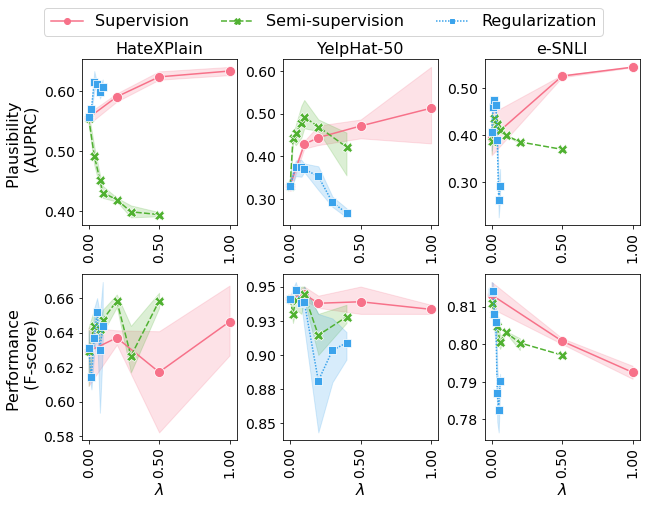

In [10]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
col = 0
row = 0

datasets = ['hatexplain', 'yelphat50', 'esnli']

report_metrics = [
    #{'y': 'a:Recall', 'ylabel': 'a:Recall' },
    #{'y': 'a:Specificity', 'ylabel': 'a:Specificity' },
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' },
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' },
]

for metric in report_metrics:
    
    for dataset in datasets:
        
        data = df_constraint[df_constraint['Dataset'] == dataset]
        data = data[data['lambda'] < 2]
        #data = data[data['Technique'] != 'Regularization']
        #data = data[data['lambda'] * 1000 % 10 == 0]
        
        ax = axes[row][col]
        col +=1
        if col > 2:
            col = 0
            row += 1

        graphic = sns.lineplot(ax=ax, data=data, x=f'lambda', y=metric['y'], 
                               #color=colors[0],
                               hue="Technique",
                               palette=palette_technique,
                               markers=True, 
                               style='Technique', 
                               markersize=10,
                              )


        #graphic.tick_params(labelrotation=90)
        ax.tick_params(axis='x', rotation=90, labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
        
# set labels
axes[0][0].set_title('HateXPlain',fontsize=16)
axes[0][1].set_title('YelpHat-50',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

#axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
#axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)


axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)

axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)



axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[0][2].set_xlabel('')
axes[1][0].set_xlabel('$\lambda$',fontsize=16)
axes[1][1].set_xlabel('$\lambda$',fontsize=16)
axes[1][2].set_xlabel('$\lambda$',fontsize=16)

# no space between subfig
fig.subplots_adjust(hspace=.3, wspace=.3)

# make legend
lines, labels = axes[0][0].get_legend_handles_labels() 
fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
#plt.savefig(path.join(tmp_path, 'semisupervision_fscore_auprc.png'), bbox_inches="tight", dpi=300)
plt.show()
#print('Image saved in',path.join(tmp_path, 'semisupervision_fscore_auprc.png'))

#### Supervision vs semi-supervision

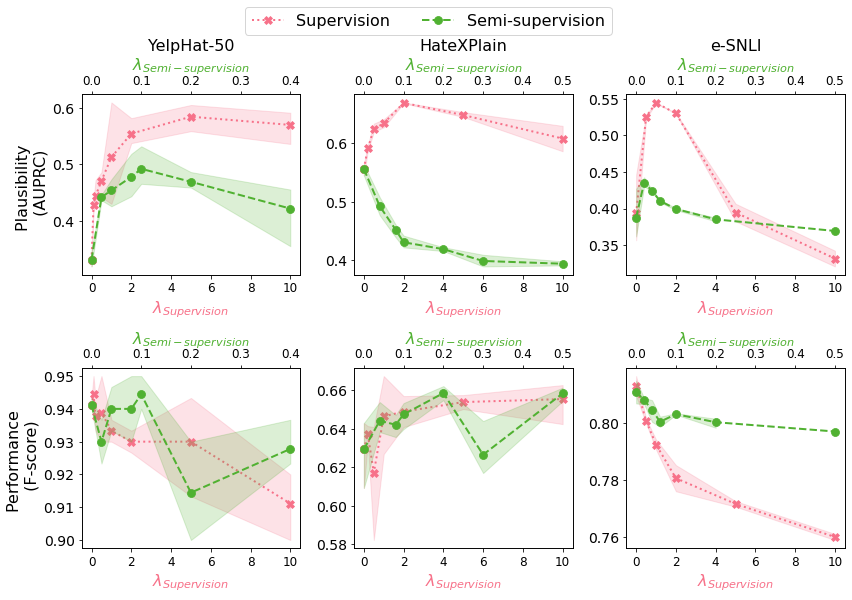

In [12]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

ordered_dataset = ['yelphat50', 'hatexplain', 'esnli']
ordered_metrics = ['a:AUPRC', 'y:fscore']

def get_summary(df, technique, dataset):
    return df[(df['Technique'] == technique) & (df['Dataset'] == dataset)]

for idx_row, axe_row in enumerate(axes):

    metric = ordered_metrics[idx_row] 
    
    for idx_col, ax in enumerate(axe_row):

        dataset = ordered_dataset[idx_col]

        df_sup = get_summary(df_constraint, 'Supervision', dataset)
        df_sem = get_summary(df_constraint, 'Semi-supervision', dataset)

        sns.lineplot(data=df_sup, label='Supervision',
                     x='lambda', 
                     y=metric, 
                     marker='X', 
                     linestyle='dotted', 
                     color=colors[0], 
                     markeredgecolor=colors[0], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax)
        ax.set_xlabel('$\lambda_{Supervision}$', color=colors[0], fontsize=16)

        ax2 = ax.twiny()

        sns.lineplot(data=df_sem, label='Semi-supervision',
                     x='lambda', 
                     y=metric, 
                     marker='o', 
                     linestyle='dashed', 
                     color=colors[1], 
                     markeredgecolor=colors[1], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax2)

        # Setting labels
        ax2.set_xlabel('$\lambda_{Semi-supervision}$', color=colors[1], fontsize=16)

        
        ax.tick_params(axis='x', labelsize=12)
        ax2.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=14)

# make legend
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1+lines_2
labels = labels_1+labels_2
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        a.get_shared_y_axes().get_siblings(a)[0].get_legend().remove()

        
# no space between subfig
fig.subplots_adjust(hspace=.5, wspace=.3)
        
# set labels: on the left side
axes[0][0].set_title('YelpHat-50', fontsize=16)
axes[0][1].set_title('HateXPlain', fontsize=16)
axes[0][2].set_title('e-SNLI', fontsize=16)

# set labels: on the top
axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

# remove all other labels
axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)
axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)

os.makedirs(EXP_ROOT + '/constraint_learning', exist_ok=True)
# Improve layout
plt.tight_layout()
plt.savefig(EXP_ROOT + '/constraint_learning/semisupervision_fscore_auprc.png', bbox_inches="tight", dpi=300)
plt.show()

#### Supervision vs regularization

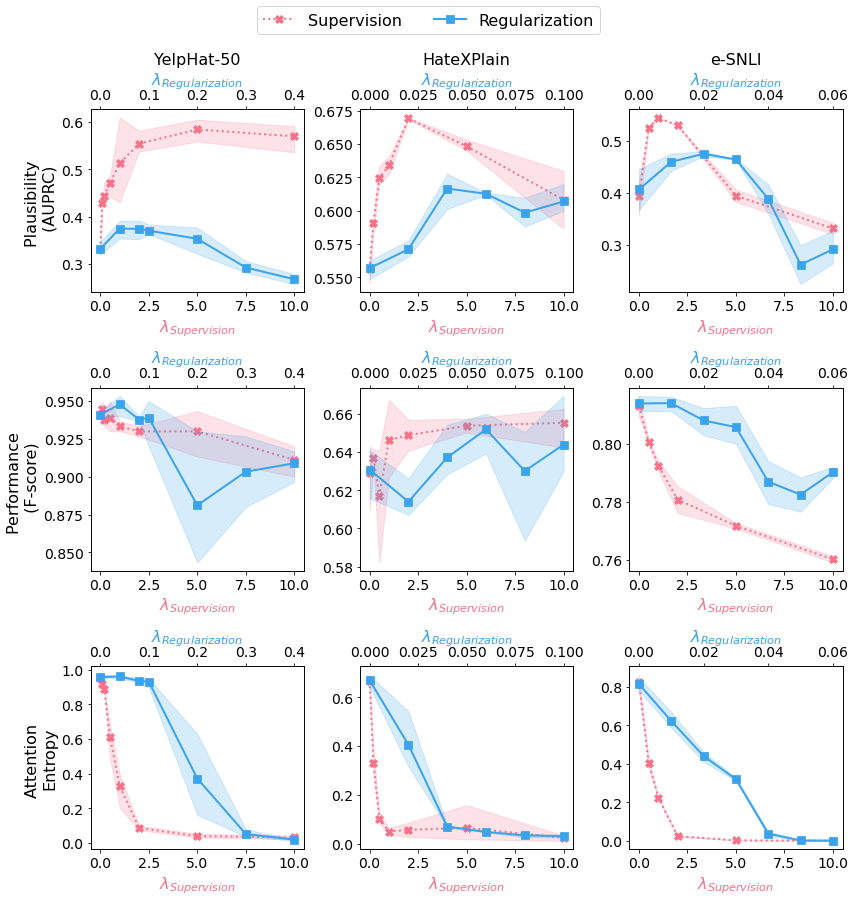

In [13]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

ordered_dataset = ['yelphat50', 'hatexplain', 'esnli']
ordered_metrics = ['a:AUPRC', 'y:fscore', 'a:entropy']

def get_summary(df, technique, dataset):
    return df[(df['Technique'] == technique) & (df['Dataset'] == dataset)]

for idx_row, axe_row in enumerate(axes):

    metric = ordered_metrics[idx_row] 
    
    for idx_col, ax in enumerate(axe_row):

        dataset = ordered_dataset[idx_col]

        df_sup = get_summary(df_constraint, 'Supervision', dataset)
        df_reg = get_summary(df_constraint, 'Regularization', dataset)

        sns.lineplot(data=df_sup, label='Supervision',
                     x='lambda', 
                     y=metric, 
                     marker='X', 
                     linestyle='dotted', 
                     color=colors[0], 
                     markeredgecolor=colors[0], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax)
        ax.set_xlabel('$\lambda_{Supervision}$', color=colors[0], fontsize=16)

        ax2 = ax.twiny()

        sns.lineplot(data=df_reg, label='Regularization',
                     x='lambda', 
                     y=metric, 
                     marker='s', 
                     linestyle='-', 
                     color=colors[2], 
                     markeredgecolor=colors[2], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax2)
        
        # Setting labels
        ax2.set_xlabel('$\lambda_{Regularization}$', color=colors[2], fontsize=16)

        ax.tick_params(axis='x', labelsize=14)
        ax2.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        

# make legend
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1+lines_2
labels = labels_1+labels_2
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        a.get_shared_y_axes().get_siblings(a)[0].get_legend().remove()

        
# no space between subfig
fig.subplots_adjust(hspace=.5, wspace=.3)
        
# set labels: on the left side
axes[0][0].set_title('YelpHat-50', fontsize=16)
axes[0][1].set_title('HateXPlain', fontsize=16)
axes[0][2].set_title('e-SNLI', fontsize=16)

# set labels: on the top
axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)
axes[2][0].set_ylabel('Attention \nEntropy',fontsize=16)

# remove all other labels
axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)
axes[2][1].set_ylabel('',fontsize=16)
axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)
axes[2][2].set_ylabel('',fontsize=16)

os.makedirs(EXP_ROOT + '/constraint_learning', exist_ok=True)
# Improve layout
plt.tight_layout()
plt.savefig(EXP_ROOT + '/constraint_learning/regularization_fscore_auprc.png', bbox_inches="tight", dpi=300)
plt.show()

#### Three of them (Precision / Specificity)

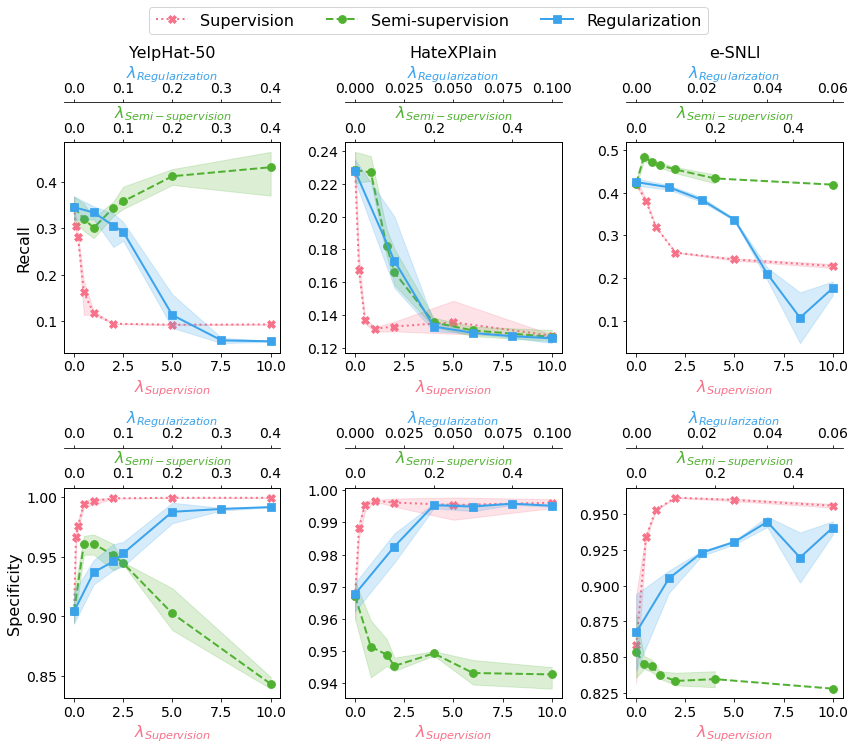

In [59]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

ordered_dataset = ['yelphat50', 'hatexplain', 'esnli']
ordered_metrics = ['a:Recall', 'a:Specificity']

def get_summary(df, technique, dataset):
    return df[(df['Technique'] == technique) & (df['Dataset'] == dataset)]

for idx_row, axe_row in enumerate(axes):

    metric = ordered_metrics[idx_row] 
    
    for idx_col, ax in enumerate(axe_row):

        dataset = ordered_dataset[idx_col]

        df_sup = get_summary(df_constraint, 'Supervision', dataset)
        df_sem = get_summary(df_constraint, 'Semi-supervision', dataset)
        df_reg = get_summary(df_constraint, 'Regularization', dataset)

        sns.lineplot(data=df_sup, label='Supervision',
                     x='lambda', 
                     y=metric, 
                     marker='X', 
                     linestyle='dotted', 
                     color=colors[0], 
                     markeredgecolor=colors[0], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax)
        ax.set_xlabel('$\lambda_{Supervision}$', color=colors[0], fontsize=16)

        ax2 = ax.twiny()
        ax3 = ax.twiny() 

        sns.lineplot(data=df_sem, label='Semi-supervision',
                     x='lambda', 
                     y=metric, 
                     marker='o', 
                     linestyle='dashed', 
                     color=colors[1], 
                     markeredgecolor=colors[1], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax2)
        ax2.set_xlabel('$\lambda_{Semi-supervision}$', color=colors[1], fontsize=16)
        
        
        sns.lineplot(data=df_reg, label='Regularization',
                     x='lambda', 
                     y=metric, 
                     marker='s', 
                     linestyle='-', 
                     color=colors[2], 
                     markeredgecolor=colors[2], 
                     markersize=8, 
                     linewidth=2,
                     ax=ax3)
        ax3.set_xlabel('$\lambda_{Regularization}$', color=colors[2], fontsize=16)
        
        
        ax.tick_params(axis='x', labelsize=14)
        ax2.tick_params(axis='x', labelsize=14)
        ax3.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        
        ax3.spines['top'].set_position(('outward', 40))
        

# make legend
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines = lines_1+lines_2+lines_3
labels = labels_1+labels_2+labels_3
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        a.get_shared_y_axes().get_siblings(a)[0].get_legend().remove()
        a.get_shared_y_axes().get_siblings(a)[2].get_legend().remove()
        
# no space between subfig
fig.subplots_adjust(hspace=1, wspace=.3)
        
# set labels: on the left side
axes[0][0].set_title('YelpHat-50', fontsize=16)
axes[0][1].set_title('HateXPlain', fontsize=16)
axes[0][2].set_title('e-SNLI', fontsize=16)

# set labels: on the top
axes[0][0].set_ylabel('Recall',fontsize=16)
axes[1][0].set_ylabel('Specificity',fontsize=16)

# remove all other labels
axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)
axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)

os.makedirs(EXP_ROOT + '/constraint_learning', exist_ok=True)
# Improve layout
plt.tight_layout()
plt.savefig(EXP_ROOT + '/constraint_learning/compare_recall_specificity.png', bbox_inches="tight", dpi=300)
plt.show()

## Chapter 5

### Plot train/val loss of models

Folder organization for automatic running: `Model name` > `train_loss.json` , `val_loss.json`

In [5]:
# root for data loading
ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs'
EXP_ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments'

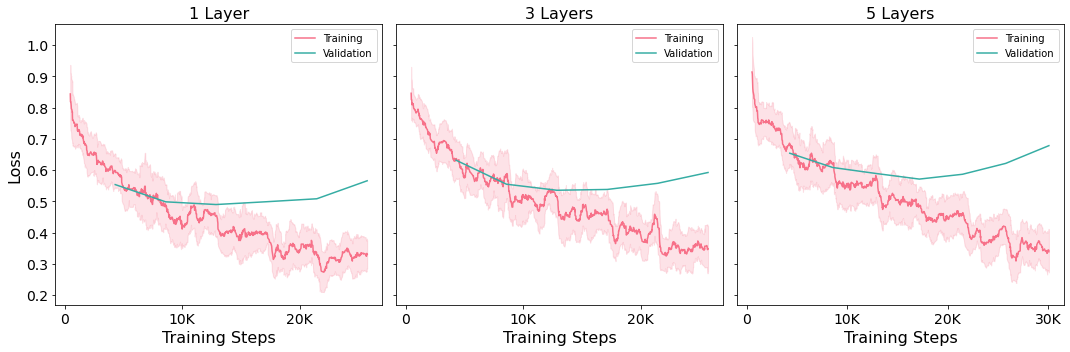

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style and color palette of the plots
#sns.set(style="whitegrid")
palette = sns.color_palette("husl", 2)  # Using a color-blind-friendly palette

# Define the path to the directories
base_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/overfitting_diagnostic'
models = ['lstm=1', 'lstm=3', 'lstm=5']
window_size = 20  # Window size for smoothing

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
#fig.subplots_adjust(wspace=0)

# Iterate over each model
for i, model in enumerate(models):
    # Load training and validation loss data
    train_loss = pd.read_csv(f'{base_path}/{model}/train_loss.csv')
    val_loss = pd.read_csv(f'{base_path}/{model}/val_loss.csv')

    # Smooth the training loss
    #train_loss['Value'] = train_loss['Value'].rolling(window=window_size).mean()
    rolling_train = train_loss['Value'].rolling(window=window_size)
    train_loss['Smoothed'] = rolling_train.mean()
    train_loss['Std'] = rolling_train.std()

    # Plot training and validation losses
    sns.lineplot(data=train_loss, x='Step', y='Smoothed', label='Training', ax=axes[i], color=palette[0])
    
    axes[i].fill_between(train_loss['Step'], train_loss['Smoothed'] - train_loss['Std'], train_loss['Smoothed'] + train_loss['Std'], color=palette[0], alpha=0.2)
    
    sns.lineplot(data=val_loss, x='Step', y='Value', label='Validation', ax=axes[i], color=palette[1], markers=True, markersize=10, )

    # Set titles and labels
    n_layer = int(model.split("=")[1])
    axes[i].set_title(f'{n_layer} Layer{"s" if n_layer > 1 else ""}', fontsize=16)
    
    # Set titles and labels, format the font size
    n_layer = int(model.split("=")[1])
    axes[i].set_title(f'{n_layer} Layer{"s" if n_layer > 1 else ""}', fontsize=16)
    axes[i].set_xlabel('Training Steps', fontsize=16)
    axes[i].set_ylabel('Loss', fontsize=16)
    axes[i].set_xlabel('Training Steps', fontsize=16)
    axes[i].set_ylabel('Loss', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    
    # Format tick labels in x-axis
    xlabels = ['{:,.0f}'.format(x) + ('K' if x > 0 else '') for x in axes[i].get_xticks()/1000]
    axes[i].set_xticks(axes[i].get_xticks()[1:-1]) # this avoid warning message
    axes[i].set_xticklabels(xlabels[1:-1])


# Set a general title
#plt.suptitle('Learning Curves Across Different Number of bi-LSTM Layers in the e-SNLI', fontsize=20)

# Improve layout
plt.tight_layout()

# Show the plot
#plt.show()
plt.savefig(base_path+'/learning_curves_lstm_layers.png', bbox_inches="tight", dpi=300)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

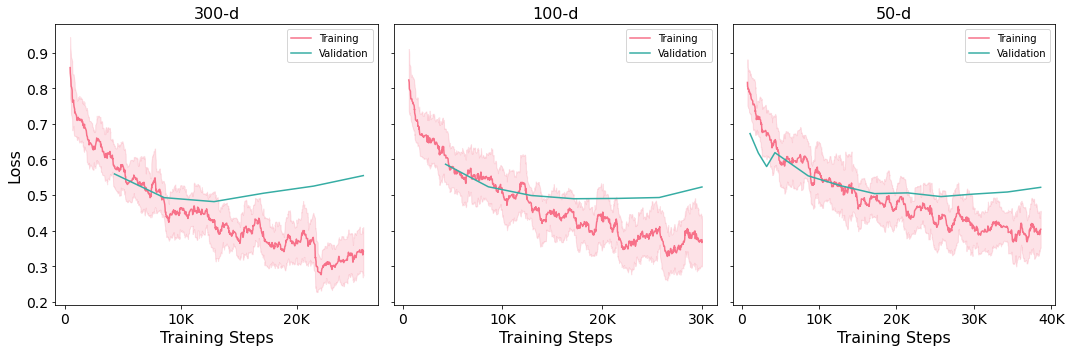

In [46]:
# Set the style and color palette of the plots
#sns.set(style="whitegrid")
palette = sns.color_palette("husl", 2)  # Using a color-blind-friendly palette

# Define the path to the directories
base_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/overfitting_diagnostic'
models = ['d=300', 'd=100', 'd=50']
window_size = 20  # Window size for smoothing

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Iterate over each model
for i, model in enumerate(models):
    # Load training and validation loss data
    train_loss = pd.read_csv(f'{base_path}/{model}/train_loss.csv')
    val_loss = pd.read_csv(f'{base_path}/{model}/val_loss.csv')
    
    # Smooth the training loss
    rolling_train = train_loss['Value'].rolling(window=window_size)
    train_loss['Smoothed'] = rolling_train.mean()
    train_loss['Std'] = rolling_train.std()
    
    # Plot training and validation losses
    sns.lineplot(data=train_loss, x='Step', y='Smoothed', label='Training', ax=axes[i], color=palette[0])
    
    axes[i].fill_between(train_loss['Step'], train_loss['Smoothed'] - train_loss['Std'], train_loss['Smoothed'] + train_loss['Std'], color=palette[0], alpha=0.2)
    
    sns.lineplot(data=val_loss, x='Step', y='Value', label='Validation', ax=axes[i], color=palette[1])

    # Set titles and labels, format the font size
    d_embedding = int(model.split("=")[1])
    axes[i].set_title(f'{d_embedding}-d', fontsize=16)
    axes[i].set_xlabel('Training Steps', fontsize=16)
    axes[i].set_ylabel('Loss', fontsize=16)
    axes[i].set_xlabel('Training Steps', fontsize=16)
    axes[i].set_ylabel('Loss', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    
    # Format tick labels in x-axis
    xlabels = ['{:,.0f}'.format(x) + ('K' if x > 0 else '') for x in axes[i].get_xticks()/1000]
    axes[i].set_xticks(axes[i].get_xticks()[1:-1]) # this avoid warning message
    axes[i].set_xticklabels(xlabels[1:-1])

    

# Set a general title
#plt.suptitle('Learning Curves of Reduced Dimension in e-SNLI', fontsize=20)

# Improve layout
plt.tight_layout()

# Show the plot
plt.savefig(base_path+'/learning_curves_d_embedding.png', bbox_inches="tight", dpi=300)
plt.show()


## Annexe

### A. Synthetize results : Constraint learnings

In [ ]:
# root for data loading
ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs'
EXP_ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments'

import yaml
import json
import pandas as pd
from tqdm.auto import tqdm

records = []

for technique in ['supervision', 'semisupervision', 'regularization']:

    technique_path = path.join(ROOT, technique)
    technique_folders = [f for f in os.listdir(technique_path) if not f.startswith('.')]

    for dataset in tqdm(technique_folders):
        dataset_path = path.join(technique_path, dataset)
        #print('dataset:', dataset)


        for instance in os.listdir(dataset_path):
            if instance.startswith('.'): continue # ignore tmp folders
            #print('instance:',instance)
            instance_path = path.join(dataset_path, instance)

            run_id = instance.split('_')[0].split('=')[1] 
            instance_id = instance

            # skip and signal if a file not exist
            if not path.exists(instance_path + '/hparams.yaml'):
                log.error(f'{instance_path}/hparams.yaml not exists')
                continue
            if not path.exists(instance_path + '/score.json'):
                log.error(f'{instance_path}/score.json not exists')
                continue

            # load hyperparameter
            with open(instance_path + '/hparams.yaml','r') as f:
                hparams = yaml.safe_load(f)
                # clean out hparam dictionary
                hparams.pop('concat_context') 

            # load result
            with open(instance_path + '/score.json','r') as f:
                score = json.load(f)
                # clean out score dictionary
                if 'a:AURecall' in score:
                    score['a:Recall'] = score.pop('a:AURecall')
                if 'a:AUPrecision' in score:
                    score['a:Precision'] = score.pop('a:AUPrecision')

            #print('hparams', hparams)
            #print('score', score)

            row = {
                'id': instance_id,
                'run': run_id,
                'Technique': technique,
                **hparams,
                **score
            }

            records.append(row)

summary = pd.DataFrame(records)

# clean out unnecessary columns
summary = summary.drop(columns=['y:accuracy', 'a:Dice', 'a:IoU', 'a:Jaccard', 'a:Precision']).rename(columns={'data':'Dataset'})
summary['Technique'] = summary['Technique'].replace({'supervision': 'Supervision', 'regularization':'Regularization', 'semisupervision':'Semi-supervision'})

  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=1_lsup=2.0/hparams.yaml not exists
16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.10/hparams.yaml not exists
16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.05/hparams.yaml not exists
16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=5.0/score.json not exists
16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=10.0/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:32  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=0_lstm=3_lheuris=0.08/hparams.yaml not exists
16-05-2024 17:59:11 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=1_lstm=5_lheuris=0.4/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

16-05-2024 17:59:12 |    ERROR   1768952205.py:<cell line: 12>:35  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=1_lstm=3_lentr=0.01/score.json not exists


In [27]:
# Technique > dataset > lambdas
lambda_display = {
    'Regularization': {
        'yelphat50': [0, .02, .04, .06, .08, .1, .15, .2, .3, .4, .6]
    }
}

for technique_of_interest in lambda_display.keys():
    for dataset_of_interest in lambda_display[technique_of_interest]:
        
        lambdas = lambda_display[technique_of_interest][dataset_of_interest]
    
        df_constraint = df_constraint[
            (df_constraint['Technique'] != technique_of_interest) |
            (df_constraint['Dataset'] != dataset_of_interest) |
            ((df_constraint['Technique'] == technique_of_interest) & (df_constraint['Dataset'] == dataset_of_interest) & (df_constraint['lambda'].isin(lambdas)))
        ]

In [28]:
df_constraint = summary[summary['n_context'] == 1].copy().reset_index(drop=True)
df_constraint = df_constraint.drop(columns=['n_context'])

# fusion lambda column

def get_lambda(row):
    if row['Technique'] == 'Regularization':
        return row['lambda_entropy']
    if row['Technique'] == 'Supervision':
        return row['lambda_supervise']
    return row['lambda_heuristic']

df_constraint['lambda'] = df_constraint[['Technique', 'lambda_entropy', 'lambda_heuristic', 'lambda_supervise']].apply(get_lambda,axis=1)
df_constraint = df_constraint.drop(columns=['lambda_entropy', 'lambda_heuristic', 'lambda_supervise', 'lambda_lagrange'])

In [58]:
from scipy.stats import sem, t

baseline_metrics = df_constraint[df_constraint['lambda'] == 0].groupby(['Technique', 'Dataset']).mean()


def calculate_ci(group, baseline):
    ci_level = 0.95
    results = {}
    technique, dataset, lambda_val = group.name
    
    # Get baseline for the current group
    if (technique, dataset) in baseline.index:
        base_means = baseline.loc[(technique, dataset)]

    for column in group.columns:
        if column not in ['id', 'run', 'Technique', 'Dataset', 'lambda']:
            mean_val = group[column].mean()
            ci_width = sem(group[column]) * t.ppf((1 + ci_level) / 2., len(group[column])-1)
            if lambda_val != 0 and (technique, dataset) in baseline.index:
                delta = mean_val - base_means[column]
                arrow = "\\deltaup{" if delta > 0 else "\\deltadown{"
                delta_str = f"{arrow}{delta:.1e}"+'}' if delta != 0 else ""
                results[column] = f"{mean_val:.2f} "+'{\scriptsize ($\pm$'+ f'{ci_width:.2f}' +")}"+delta_str
            else:
                results[column] = f"{mean_val:.2f} "+'{\scriptsize ($\pm$'+ f'{ci_width:.2f}' +")}"
    return pd.Series(results)

# Apply the function to each group defined by 'lambda', 'Technique', and 'Dataset'
df_ci = df_constraint.groupby(['Technique', 'Dataset', 'lambda',]).apply(calculate_ci, baseline=baseline_metrics).reset_index()

df_ci.columns = [col.split(':')[1].capitalize() if ':' in col else col for col in df_ci.columns]
df_ci['lambda'] = df_ci['lambda'].apply(lambda x: f"{x:.0e}")
df_ci = df_ci.rename(columns={'lambda': '$\lambda$', 'Auprc': 'AUPRC', 'Auroc': 'AUROC', 'Fscore': 'F-score'})
df_ci = df_ci[['Technique', 'Dataset', '$\lambda$', 'F-score', 'AUPRC', 'AUROC', 'Entropy']]
df_ci

/var/folders/27/htwdj0hj71b2_fd56hn08d5w0000gn/T/ipykernel_7215/4161901415.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_metrics = df_constraint[df_constraint['lambda'] == 0].groupby(['Technique', 'Dataset']).mean()
/Users/dunguyen/venv/eps/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,Technique,Dataset,$\lambda$,F-score,AUPRC,AUROC,Entropy
0,Regularization,esnli,0e+00,0.81 {\scriptsize ($\pm$0.01)},0.41 {\scriptsize ($\pm$0.07)},0.69 {\scriptsize ($\pm$0.06)},0.81 {\scriptsize ($\pm$0.07)}
1,Regularization,esnli,1e-02,0.81 {\scriptsize ($\pm$0.00)}\deltaup{1.0e-04},0.46 {\scriptsize ($\pm$0.03)}\deltaup{5.3e-02},0.72 {\scriptsize ($\pm$0.03)}\deltaup{3.6e-02},0.62 {\scriptsize ($\pm$0.08)}\deltadown{-1.9e...
2,Regularization,esnli,2e-02,0.81 {\scriptsize ($\pm$0.01)}\deltadown{-5.9e...,0.48 {\scriptsize ($\pm$0.01)}\deltaup{6.9e-02},0.73 {\scriptsize ($\pm$0.01)}\deltaup{4.3e-02},0.44 {\scriptsize ($\pm$0.06)}\deltadown{-3.7e...
3,Regularization,esnli,3e-02,0.81 {\scriptsize ($\pm$0.02)}\deltadown{-8.2e...,0.46 {\scriptsize ($\pm$0.00)}\deltaup{5.8e-02},0.73 {\scriptsize ($\pm$0.00)}\deltaup{5.0e-02},0.32 {\scriptsize ($\pm$0.03)}\deltadown{-4.9e...
4,Regularization,esnli,4e-02,0.79 {\scriptsize ($\pm$0.01)}\deltadown{-2.7e...,0.39 {\scriptsize ($\pm$0.06)}\deltadown{-1.8e...,0.68 {\scriptsize ($\pm$0.05)}\deltadown{-8.9e...,0.04 {\scriptsize ($\pm$0.02)}\deltadown{-7.8e...
...,...,...,...,...,...,...,...
78,Supervision,yelphat50,5e-01,0.94 {\scriptsize ($\pm$0.03)}\deltadown{-2.2e...,0.47 {\scriptsize ($\pm$0.06)}\deltaup{1.4e-01},0.73 {\scriptsize ($\pm$0.01)}\deltaup{7.0e-02},0.61 {\scriptsize ($\pm$0.26)}\deltadown{-3.4e...
79,Supervision,yelphat50,1e+00,0.93 {\scriptsize ($\pm$0.01)}\deltadown{-7.8e...,0.51 {\scriptsize ($\pm$0.22)}\deltaup{1.8e-01},0.75 {\scriptsize ($\pm$0.16)}\deltaup{9.5e-02},0.33 {\scriptsize ($\pm$0.27)}\deltadown{-6.3e...
80,Supervision,yelphat50,2e+00,0.93 {\scriptsize ($\pm$0.01)}\deltadown{-1.1e...,0.55 {\scriptsize ($\pm$0.06)}\deltaup{2.2e-01},0.79 {\scriptsize ($\pm$0.01)}\deltaup{1.3e-01},0.09 {\scriptsize ($\pm$0.03)}\deltadown{-8.7e...
81,Supervision,yelphat50,5e+00,0.93 {\scriptsize ($\pm$0.04)}\deltadown{-1.1e...,0.58 {\scriptsize ($\pm$0.06)}\deltaup{2.5e-01},0.79 {\scriptsize ($\pm$0.04)}\deltaup{1.3e-01},0.04 {\scriptsize ($\pm$0.03)}\deltadown{-9.2e...


In [59]:
out_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/constraint_learning'
os.makedirs(out_path,exist_ok=True)

for technique in df_ci['Technique'].unique():
    df = df_ci[df_ci['Technique'] == technique]
    df = df.drop(columns=['Technique'])
    df.style.hide(axis="index").to_latex(
        out_path+'/appendix_'+technique+'.tex', 
        caption=f"Quantitative evaluation of {technique.lower()} on attention models across different $\lambda$ values. For each $\lambda$, we average over three runs at different random seeds.",
        position_float='centering',
        hrules=True,
    )
    print('Saved', out_path+'/appendix_'+technique+'.tex')

Saved /Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/constraint_learning/appendix_Regularization.tex
Saved /Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/constraint_learning/appendix_Semi-supervision.tex
Saved /Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/constraint_learning/appendix_Supervision.tex


In [24]:
group_sizes = df_constraint.groupby(['lambda', 'Technique', 'Dataset']).size()
print(group_sizes[group_sizes < 2])

lambda  Technique         Dataset
0.5     Semi-supervision  esnli      1
dtype: int64


In [46]:
0.48 - 0.41

0.07